In [89]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df_auto = pd.read_csv("/data/renhaoye/decals_2022/fits.csv")

In [91]:
threshold = 0.5

In [92]:
merger = major = df_auto.query('merging_minor_disturbance_fraction > %f '
                               '| merging_major_disturbance_fraction > %f '
                               '| merging_merger_fraction > %f '
                               % (threshold, threshold, threshold))
merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7231 entries, 57 to 313350
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         7231 non-null   int64  
 1   ra                                                 7231 non-null   float64
 2   dec                                                7231 non-null   float64
 3   iauname                                            7231 non-null   object 
 4   petro_theta                                        7231 non-null   float64
 5   petro_th50                                         7231 non-null   float64
 6   petro_th90                                         7231 non-null   float64
 7   elpetro_absmag_r                                   7231 non-null   float64
 8   sersic_nmgy_r                                      7231 non-null   float64
 9   redsh

In [93]:
smoothRounded = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_round_fraction > %f' % (0.7, 0.8))
smoothRounded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30541 entries, 17 to 313381
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         30541 non-null  int64  
 1   ra                                                 30541 non-null  float64
 2   dec                                                30541 non-null  float64
 3   iauname                                            30541 non-null  object 
 4   petro_theta                                        30541 non-null  float64
 5   petro_th50                                         30541 non-null  float64
 6   petro_th90                                         30541 non-null  float64
 7   elpetro_absmag_r                                   30541 non-null  float64
 8   sersic_nmgy_r                                      30541 non-null  float64
 9   reds

In [94]:
smoothInBetween = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_in_between_fraction > %f' % (0.7, 0.85))
smoothInBetween.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32790 entries, 5 to 313370
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         32790 non-null  int64  
 1   ra                                                 32790 non-null  float64
 2   dec                                                32790 non-null  float64
 3   iauname                                            32790 non-null  object 
 4   petro_theta                                        32790 non-null  float64
 5   petro_th50                                         32790 non-null  float64
 6   petro_th90                                         32790 non-null  float64
 7   elpetro_absmag_r                                   32790 non-null  float64
 8   sersic_nmgy_r                                      32790 non-null  float64
 9   redsh

In [95]:
smoothCigarShaped = df_auto.query('smooth_or_featured_smooth_fraction > %f '
                                  '& how_rounded_cigar_shaped_fraction > %f' % (threshold, threshold))
smoothCigarShaped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26547 entries, 9 to 313359
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         26547 non-null  int64  
 1   ra                                                 26547 non-null  float64
 2   dec                                                26547 non-null  float64
 3   iauname                                            26547 non-null  object 
 4   petro_theta                                        26547 non-null  float64
 5   petro_th50                                         26547 non-null  float64
 6   petro_th90                                         26547 non-null  float64
 7   elpetro_absmag_r                                   26547 non-null  float64
 8   sersic_nmgy_r                                      26547 non-null  float64
 9   redsh

In [96]:
edgeOnNoBulge = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                            '& disk_edge_on_yes_fraction > %f'
                            '& edge_on_bulge_none_fraction > %f'
                            % (threshold, threshold, threshold))
edgeOnNoBulge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 90 to 313330
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         2952 non-null   int64  
 1   ra                                                 2952 non-null   float64
 2   dec                                                2952 non-null   float64
 3   iauname                                            2952 non-null   object 
 4   petro_theta                                        2952 non-null   float64
 5   petro_th50                                         2952 non-null   float64
 6   petro_th90                                         2952 non-null   float64
 7   elpetro_absmag_r                                   2952 non-null   float64
 8   sersic_nmgy_r                                      2952 non-null   float64
 9   redsh

In [97]:
edgeOnBulge = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                          '& disk_edge_on_yes_fraction > %f'
                          '& edge_on_bulge_boxy_fraction < (1-%f)'
                            % (threshold, threshold, threshold))
edgeOnBulge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 29 to 313380
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         15819 non-null  int64  
 1   ra                                                 15819 non-null  float64
 2   dec                                                15819 non-null  float64
 3   iauname                                            15819 non-null  object 
 4   petro_theta                                        15819 non-null  float64
 5   petro_th50                                         15819 non-null  float64
 6   petro_th90                                         15819 non-null  float64
 7   elpetro_absmag_r                                   15818 non-null  float64
 8   sersic_nmgy_r                                      15819 non-null  float64
 9   reds

In [50]:
# edgeOn = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
#                             '& disk_edge_on_yes_fraction > %f'
#                             % (threshold, threshold))
# edgeOn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 29 to 313380
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         15900 non-null  int64  
 1   ra                                                 15900 non-null  float64
 2   dec                                                15900 non-null  float64
 3   iauname                                            15900 non-null  object 
 4   petro_theta                                        15900 non-null  float64
 5   petro_th50                                         15900 non-null  float64
 6   petro_th90                                         15900 non-null  float64
 7   elpetro_absmag_r                                   15899 non-null  float64
 8   sersic_nmgy_r                                      15900 non-null  float64
 9   reds

In [98]:
diskNoBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '& bar_no_fraction > %f '
                                % (threshold, threshold, threshold))
diskNoBar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38575 entries, 2 to 313374
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         38575 non-null  int64  
 1   ra                                                 38575 non-null  float64
 2   dec                                                38575 non-null  float64
 3   iauname                                            38575 non-null  object 
 4   petro_theta                                        38575 non-null  float64
 5   petro_th50                                         38575 non-null  float64
 6   petro_th90                                         38575 non-null  float64
 7   elpetro_absmag_r                                   38575 non-null  float64
 8   sersic_nmgy_r                                      38575 non-null  float64
 9   redsh

In [99]:
diskWeakBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '& bar_weak_fraction > %f '
                                % (threshold, threshold, threshold))
diskWeakBar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3527 entries, 118 to 313205
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         3527 non-null   int64  
 1   ra                                                 3527 non-null   float64
 2   dec                                                3527 non-null   float64
 3   iauname                                            3527 non-null   object 
 4   petro_theta                                        3527 non-null   float64
 5   petro_th50                                         3527 non-null   float64
 6   petro_th90                                         3527 non-null   float64
 7   elpetro_absmag_r                                   3527 non-null   float64
 8   sersic_nmgy_r                                      3527 non-null   float64
 9   reds

In [53]:
# diskNoWeakBar = pd.concat([diskNoBar, diskWeakBar], ignore_index=True)
# diskNoWeakBar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42102 entries, 0 to 42101
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         42102 non-null  int64  
 1   ra                                                 42102 non-null  float64
 2   dec                                                42102 non-null  float64
 3   iauname                                            42102 non-null  object 
 4   petro_theta                                        42102 non-null  float64
 5   petro_th50                                         42102 non-null  float64
 6   petro_th90                                         42102 non-null  float64
 7   elpetro_absmag_r                                   42102 non-null  float64
 8   sersic_nmgy_r                                      42102 non-null  float64
 9   redshi

In [100]:
diskStrongBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_strong_fraction > %f '
                                % (threshold, threshold, threshold))
diskStrongBar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 14 to 313363
Data columns (total 92 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         4041 non-null   int64  
 1   ra                                                 4041 non-null   float64
 2   dec                                                4041 non-null   float64
 3   iauname                                            4041 non-null   object 
 4   petro_theta                                        4041 non-null   float64
 5   petro_th50                                         4041 non-null   float64
 6   petro_th90                                         4041 non-null   float64
 7   elpetro_absmag_r                                   4041 non-null   float64
 8   sersic_nmgy_r                                      4041 non-null   float64
 9   redsh

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
merger_train, merger_test = train_test_split(merger, test_size=0.1, random_state=1926)
merger_train, merger_valid = train_test_split(merger_train, test_size=0.1, random_state=1926)

smoothRounded_train, smoothRounded_test = train_test_split(smoothRounded, test_size=0.1, random_state=1926)
smoothRounded_train, smoothRounded_valid = train_test_split(smoothRounded_train, test_size=0.1, random_state=1926)

smoothInBetween_train, smoothInBetween_test = train_test_split(smoothInBetween, test_size=0.1, random_state=1926)
smoothInBetween_train, smoothInBetween_valid = train_test_split(smoothInBetween_train, test_size=0.1, random_state=1926)

smoothCigarShaped_train, smoothCigarShaped_test = train_test_split(smoothCigarShaped, test_size=0.1, random_state=1926)
smoothCigarShaped_train, smoothCigarShaped_valid = train_test_split(smoothCigarShaped_train, test_size=0.1, random_state=1926)

# edgeOn_train, edgeOn_test = train_test_split(edgeOn, test_size=0.1, random_state=1926)
# edgeOn_train, edgeOn_valid = train_test_split(edgeOn_train, test_size=0.1, random_state=1926)
edgeOnBulge_train, edgeOnBulge_test = train_test_split(edgeOnBulge, test_size=0.1, random_state=1926)
edgeOnBulge_train, edgeOnBulge_valid = train_test_split(edgeOnBulge_train, test_size=0.1, random_state=1926)

edgeOnNoBulge_train, edgeOnNoBulge_test = train_test_split(edgeOnNoBulge, test_size=0.1, random_state=1926)
edgeOnNoBulge_train, edgeOnNoBulge_valid = train_test_split(edgeOnNoBulge_train, test_size=0.1, random_state=1926)

diskNoBar_train, diskNoBar_test = train_test_split(diskNoBar, test_size=0.1, random_state=1926)
diskNoBar_train, diskNoBar_valid = train_test_split(diskNoBar_train, test_size=0.1, random_state=1926)

diskWeakBar_train, diskWeakBar_test = train_test_split(diskWeakBar, test_size=0.1, random_state=1926)
diskWeakBar_train, diskWeakBar_valid = train_test_split(diskWeakBar_train, test_size=0.1, random_state=1926)

diskStrongBar_train, diskStrongBar_test = train_test_split(diskStrongBar, test_size=0.1, random_state=1926)
diskStrongBar_train, diskStrongBar_valid = train_test_split(diskStrongBar_train, test_size=0.1, random_state=1926)

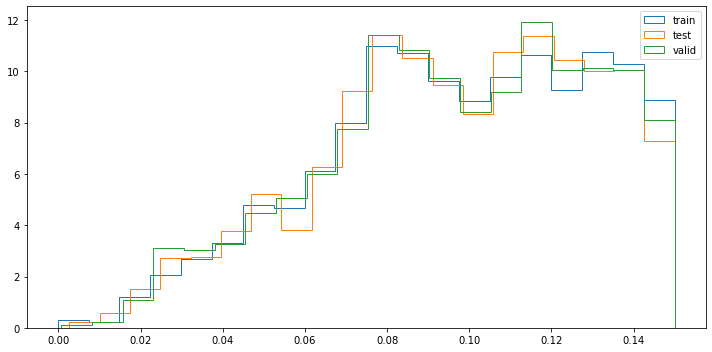

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(smoothRounded_train.redshift, histtype="step", label = "train", bins=20,density=True)
plt.hist(smoothRounded_test.redshift, histtype="step", label = "test", bins=20,density=True)
plt.hist(smoothRounded_valid.redshift, histtype="step", label = "valid", bins=20,density=True)
plt.legend(loc="best")
plt.tight_layout()

In [64]:
merger_valid.iloc[1].ra

151.150345

In [103]:
RAW_PATH = "/data/renhaoye/decals_2022/in_decals/augmentation_all/"
def generate_txt(df_galaxy: pd.DataFrame, label: int, train: bool):
    tail = [".fits", "_flipped.fits", "_rotated.fits", "_shifted.fits"]
    galaxy_list = []
    for i in range(len(df_galaxy)):
    # for i in range(20):
        if train:
            for j in tail:
                # print(RAW_PATH + str(float(df_galaxy.iloc[i].ra)) + "_" + str(float(df_galaxy.iloc[i].dec)) + j + " " + label + "\n")
                galaxy_list.append(RAW_PATH + str(float(df_galaxy.iloc[i].ra)) + "_" + str(float(df_galaxy.iloc[i].dec)) + j + " " + str(label) + "\n")
        else:
            galaxy_list.append(RAW_PATH + str(float(df_galaxy.iloc[i].ra)) + "_" + str(float(df_galaxy.iloc[i].dec)) + tail[0] + " " + str(label) + "\n")
    return galaxy_list

In [104]:
with open("/data/renhaoye/decals_2022/train-CLASS_9-STF.txt", "w") as w:
    w.writelines(generate_txt(merger_train, label=0, train=True))
    w.writelines(generate_txt(smoothRounded_train, label=1, train=False))
    w.writelines(generate_txt(smoothInBetween_train, label=2, train=False))
    w.writelines(generate_txt(smoothCigarShaped_train, label=3, train=False))
    # w.writelines(generate_txt(edgeOn_train, label=4, train=True))
    # w.writelines(generate_txt(diskNoWeakBar_train, label=5, train=False))
    w.writelines(generate_txt(edgeOnBulge_train, label=4, train=False))
    w.writelines(generate_txt(edgeOnNoBulge_train, label=5, train=True))
    w.writelines(generate_txt(diskNoBar_train, label=6, train=False))
    w.writelines(generate_txt(diskWeakBar_train, label=7, train=True))
    w.writelines(generate_txt(diskStrongBar_train, label=8, train=True))

In [105]:
with open("/data/renhaoye/decals_2022/valid-CLASS_9-STF.txt", "w") as w:
    w.writelines(generate_txt(merger_valid, label=0, train=False))
    w.writelines(generate_txt(smoothRounded_valid, label=1, train=False))
    w.writelines(generate_txt(smoothInBetween_valid, label=2, train=False))
    w.writelines(generate_txt(smoothCigarShaped_valid, label=3, train=False))
    # w.writelines(generate_txt(edgeOn_valid, label=4, train=False))
    # w.writelines(generate_txt(diskNoWeakBar_valid, label=5, train=False))
    w.writelines(generate_txt(edgeOnBulge_valid, label=4, train=False))
    w.writelines(generate_txt(edgeOnNoBulge_valid, label=5, train=False))
    w.writelines(generate_txt(diskNoBar_valid, label=6, train=False))
    w.writelines(generate_txt(diskWeakBar_valid, label=7, train=False))
    w.writelines(generate_txt(diskStrongBar_valid, label=8, train=False))

In [106]:
with open("/data/renhaoye/decals_2022/test-CLASS_9-STF.txt", "w") as w:
    w.writelines(generate_txt(merger_test, label=0, train=False))
    w.writelines(generate_txt(smoothRounded_test, label=1, train=False))
    w.writelines(generate_txt(smoothInBetween_test, label=2, train=False))
    w.writelines(generate_txt(smoothCigarShaped_test, label=3, train=False))
    # w.writelines(generate_txt(edgeOn_test, label=4, train=False))
    # w.writelines(generate_txt(diskNoWeakBar_test, label=5, train=False))
    w.writelines(generate_txt(edgeOnBulge_test, label=4, train=False))
    w.writelines(generate_txt(edgeOnNoBulge_test, label=5, train=False))
    w.writelines(generate_txt(diskNoBar_test, label=6, train=False))
    w.writelines(generate_txt(diskWeakBar_test, label=7, train=False))
    w.writelines(generate_txt(diskStrongBar_test, label=8, train=False))

In [107]:
print(len(merger_train),len(smoothRounded_train),len(smoothInBetween_train),len(smoothCigarShaped_train),len(edgeOnBulge_train),len(edgeOnNoBulge_train),len(diskNoBar_train),len(diskWeakBar_train),len(diskStrongBar_train))

5856 24737 26559 21502 12813 2390 31245 2856 3272


In [108]:
print(4*len(merger_train),len(smoothRounded_train),len(smoothInBetween_train),len(smoothCigarShaped_train),len(edgeOnBulge_train),4*len(edgeOnNoBulge_train),len(diskNoBar_train),4*len(diskWeakBar_train),4*len(diskStrongBar_train))

23424 24737 26559 21502 12813 9560 31245 11424 13088


In [109]:
print(4*len(merger_train)+len(smoothRounded_train)+len(smoothInBetween_train)+len(smoothCigarShaped_train)+len(edgeOnBulge_train)+4*len(edgeOnNoBulge_train)+len(diskNoBar_train)+4*len(diskWeakBar_train)+4*len(diskStrongBar_train))

174352


In [88]:
# weight = [23424, 24737,26559, 21502, 12879, 34101, 13088]
weight =[1-(23424 / 156290), 1-(24737 / 156290), 1-(26559 / 156290),  1-(21502 / 156290),  1-(12879 / 156290),  1-(34101 / 156290),  1-(13088 / 156290)]
weight

[0.8501247680593769,
 0.8417237187280057,
 0.830065903128799,
 0.8624224198605157,
 0.9175954955531384,
 0.7818094567790645,
 0.9162582378910998]

In [ ]:
weight =